# Red Wine Quality Activity

Contoso Farm Data Systems is opening a new line products for the wine makers of the world. The goal of Contessa’s newest efforts is to develop an application that can predict the quality of wine based on a number of factors. Additionally, they have a small dataset of wine data that they would like to be sorted into different classifications.

In this project you will do both regression and classification tasks on this data. It will test your understanding in different fields – outlier detection, feature selection, and unbalanced data. There are 1599 rows and 12 columns in this dataset.


## What is objective in wine quality?

As data scientists working with red wine, it's important that we understand the **domain** of wine to the level that we can make some inferences about data.

Since we are all not wine experts, let's spend a few minutes going over what makes wine good or bad.

A good wine is, above all, a wine that you like enough to drink, because the whole purpose of a wine is to give pleasure to those who drink it. After that, how good a wine is depends on how it measures up to a set of (more or less) agreed-upon standards of performance established by experienced, trained experts. These standards involve mysterious concepts like balance, length, depth, complexity, finish, and trueness to type of wine. None of these concepts is objectively measurable, by the way. So how do we test this data to figure out it's quality?

Taste is personal. Literally! The perception of the basic tastes on the tongue varies from one person to the next. Research has proven that some people have more taste buds than others, and are, therefore, more sensitive to characteristics such as sourness or bitterness in food and beverages. The most sensitive tasters are called, somewhat misleadingly, supertasters — not because they’re more expert, but because they perceive sensations such as bitterness more acutely. If you find diet sodas very bitter, or if you need to add a lot of sugar to your coffee to make it palatable, you might fall into this category — and you, therefore, might find many red wines unpleasant, even if other people consider them great.

### Balance

The three words sweetness, acidity, and tannin represent three of the major components (parts) of wine. The fourth is alcohol. Besides being one of the reasons we often want to drink a glass of wine in the first place, alcohol is an important player in wine quality.

Balance is the relationship of these four components to one another. A wine is balanced when nothing sticks out, such as harsh tannin or too much sweetness, as you taste the wine. Most wines are balanced to most people. But if you have any pet peeves about food — if you really hate anything tart, for example, or if you never eat sweets — you might perceive some wines to be unbalanced. If you perceive them to be unbalanced, then they are unbalanced for you. (Professional tasters know their own idiosyncrasies and adjust for them when they judge wine.)

### Length

When we call wines long or short, we’re not referring to the size of the bottle or how quickly we empty it. Length describes a wine that gives an impression of going all the way on the palate — you can taste it across the full length of your tongue — rather than stopping short halfway through your tasting of it. Many wines today are very upfront on the palate — they make a big impression as soon as you taste them, but they don’t go the distance in your mouth. In other words, they’re short. Length is increasingly used also to describe a wine with a long aftertaste. (See the section, “Finish,” just ahead.) Length in the mouth can more precisely be called palate length, to avoid confusion. Long palate length is a sure sign of high quality.

### Depth

Depth is another subjective, unmeasurable attribute of a high-quality wine. We say a wine has depth when it seems to have a dimension of verticality — that is, it doesn’t taste flat and one-dimensional in your mouth. A “flat” wine can never be great.

### Complexity

Nothing is wrong with a simple, straightforward wine, especially if you enjoy it. But a wine that keeps revealing different things about itself, always showing you a new flavor or impression — a wine that has complexity — is usually considered better quality. Generally, experts use the term complexity specifically to indicate that a wine has a multiplicity of aromas and flavors; some people use the term it in a more holistic (but less precise) sense, to refer to the total impression a wine gives you, but this use is becoming uncommon.

### Finish
The impression a wine leaves in the back of your mouth and in your throat after you swallow it is its finish or aftertaste. In a good wine, you can still perceive the wine’s flavors, such as fruitiness or spiciness, at that point. The more enduring the positive flavor perception is, the longer the finish is. Some wines may finish hot, because of high alcohol, or bitter, because of tannin — both shortcomings. Or a wine may have nothing much at all to say for itself after you swallow, which tells you that it is probably not a great wine.

### Now what?

We can see that it's going to be hard to match up these qualities with the qualities that are present in the wine study. We can intuitively infer some things but the accuracy of those inferences are going to be very subject. To start let's take a deep dive and look at the data with a number of different visualizations to see if we can make some connections to the data.



In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# These packages are the standard Python libraries for data science that we've used in our workshops.
# The only new one is the missingno package. Look up that package and figure out what it does.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Configure the data viz and set some graph styles
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight') # What is a FiveThirtyEight style sheet?
sns.set(style='whitegrid',color_codes=True)

# Since we are going to look at a number of models let's import them all now.

# Here are the scikit-learn modules that we will use for classification.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

# Linear Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

# Evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

### 'missingno' as msno

In this project we will use an interesting and useful library called 'missingno.' Some of you card players may recall a certain game with little monsters, gyms, and balls--this is not that. Missingno is a data visualization library in Python for visualing missing data within our datasets.


Looking at the imports above it's easy to just wash over the lines of code here and not pay too much attention. Take some time before you continue to look at each command. If you don't know what it does, use the built in documentation in IPython/Jupyter Notebooks to explore.

## Wine Quality Dataset

Since we are thorough and professional data scientists, let's first examine this dataset and try to understand what it it.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link](http://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

The dataset contains details about samples of wine and different features accounting for the concentrations of the different chemicals in the wine. The target variable is the quality of the wine on a scale of 0-10.

Attribute Information:

For more information, read [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016).
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [2]:
df=pd.read_csv(r'Data/winequality.csv')

### Do you prefer red or white, or both?
If you look inside of our data folder you will see that there are three data files with wine quality data on them--one for white, red, and then a general wine quality dataset. Since the red and white datasets are so large, I've created a general wine dataset that take 1600 records from both. That way we don't have to worry about the specific type of wine, and the red and white datasets are much larger and would require more time to process.

Work through the winequality.csv dataset first, and then if you are feeling confident, try to do the same process on the red or white datasets on your own.

In [3]:
df.shape

(1599, 12)

In [4]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Look at the data

`Quality` is the variable that we want to predict. Look at the data above. Notice that we have the `quality` values on the right side of the sheet. Our task, in laymans terms, is to compare the `quality` value to the other values and come up with a way to figure out how that value was calculated. 

In [5]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Exploring the dataset

Recall the diagram that we saw earlier that deals with the whole Data Science process. Remember that in the beginning of our process we must spend some time investigating and learning as much as we can about the dataset that we are working with. This gives us a number of advantages when we move forward through the process, we'll be able to ask better questions and also figure out the right model or combination of models that will teach us the most.

As we explore, we'll look for things like None, Null, and/or NaN values. We'll look for duplicate data and also for extreme outliers. Furthermore, we'll ask ourselves if things are making sense--and then formulate experiments to help us find the answers that are hidden in our datasets.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check for null and NaN values

From the .info function we can see that the data seems pretty complete, let's take a deeper look.

We can visualize null values in a couple of different ways. We want to make sure we take care of this step as soon as possible so we know the munging and wrangling steps we'll have to take. Let's first use the .isnull() method along with .sum() to scan and count the missing values that we have in our data.

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Another way to visualize null values

We introduced the missingno library in the beginning of this activity. We can process our dataframe and also see with this modified bar style graph that ther are no null or missing values in our data. Charts like these are valuable because they are very efficient in showing us things about our data quickly and without us having to make any other assumptions.

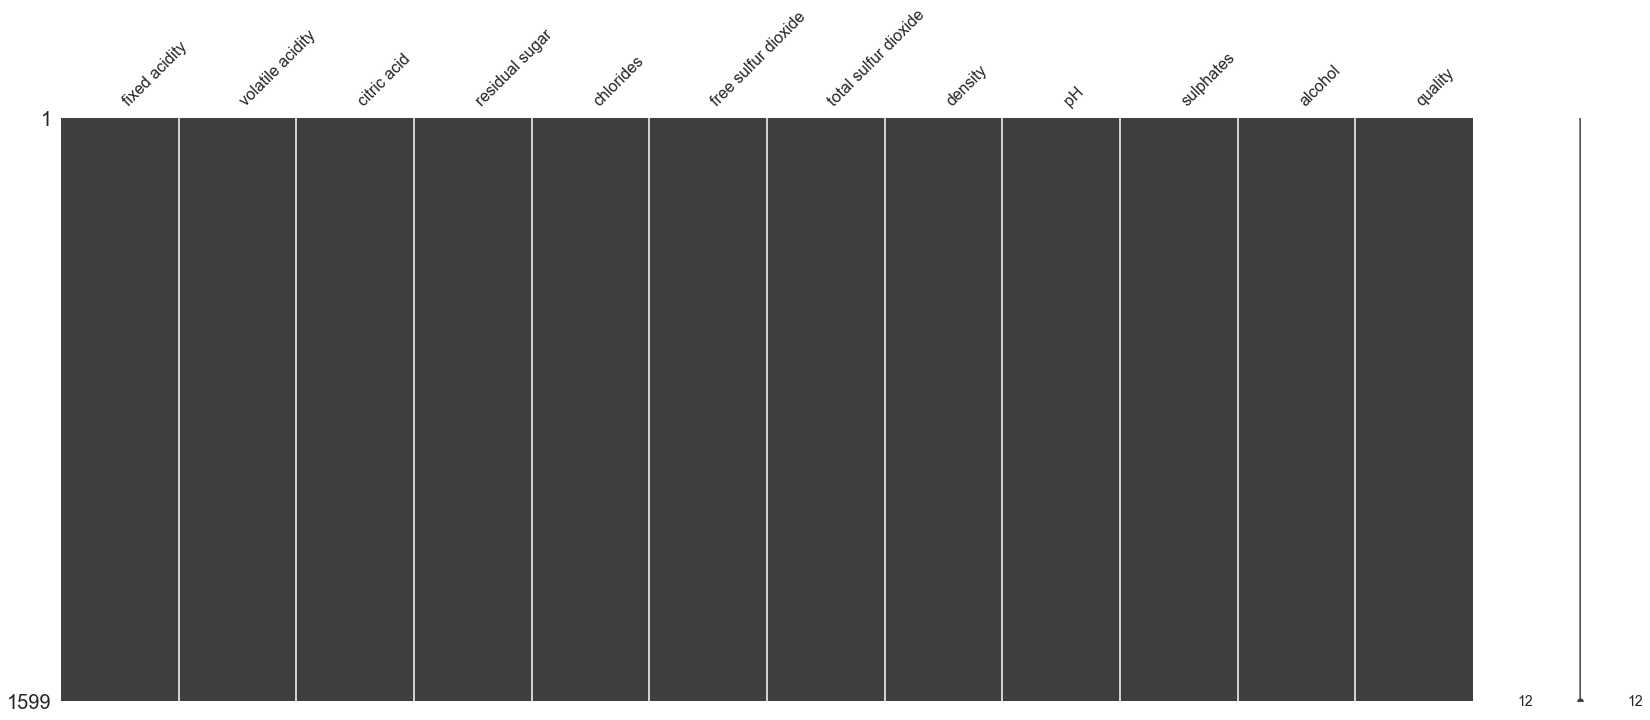

In [8]:
msno.matrix(df)  

#  Visualization of the distribution of variables using `describe()`

Descriptive or summary statistics in python (using pandas), can be obtained by using describe function (`describe()). The `describe()` Function gives the mean, std and IQR (InterQuartile Rage) values.

Generally the `describe()` function excludes the character columns and gives summary statistics of numeric columns.  
We need to add a parameter `include=’all’` to get the summary statistics or descriptive statistics of both numeric and character column.

We can see that the max value for `quality` here is 8.00 and the lowest value given to a wine is a 3.00. 

In [9]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Factorplots and FacetGrids: Exploring data using other methods

The FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

A FacetGrid can be drawn with up to three dimensions − row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid.

The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

Let's use seaborn to create a FacetGrid and look at the data in another way.

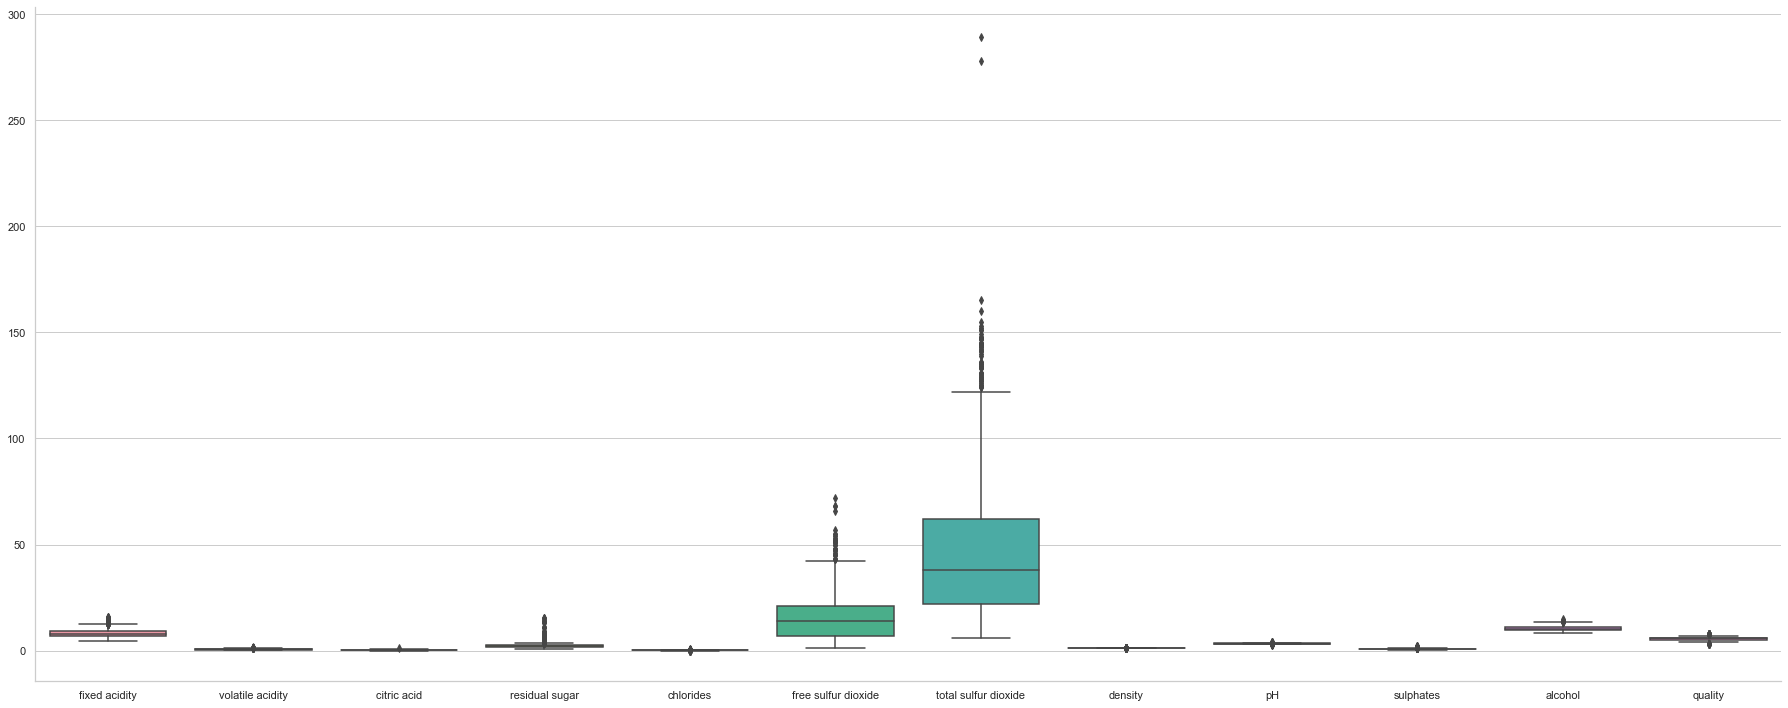

In [10]:
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.

### Plotting features of the wine data in individual histograms
A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. 

To construct a histogram from a continuous variable you first need to split the data into intervals, called bins. In the example below, the individual features of the wine data has been split into 10 bins per histogram, with each bin representing a slightly different scale dependent on the feature. Each bin contains the number of occurrences of scores in the data set that are contained within that bin.

Notice that, unlike a bar chart, there are no "gaps" between the bars (although some bars might be "absent" reflecting no frequencies). This is because a histogram represents a continuous data set, and as such, there are no gaps in the data (although you will have to decide whether you round up or round down scores on the boundaries of bins).

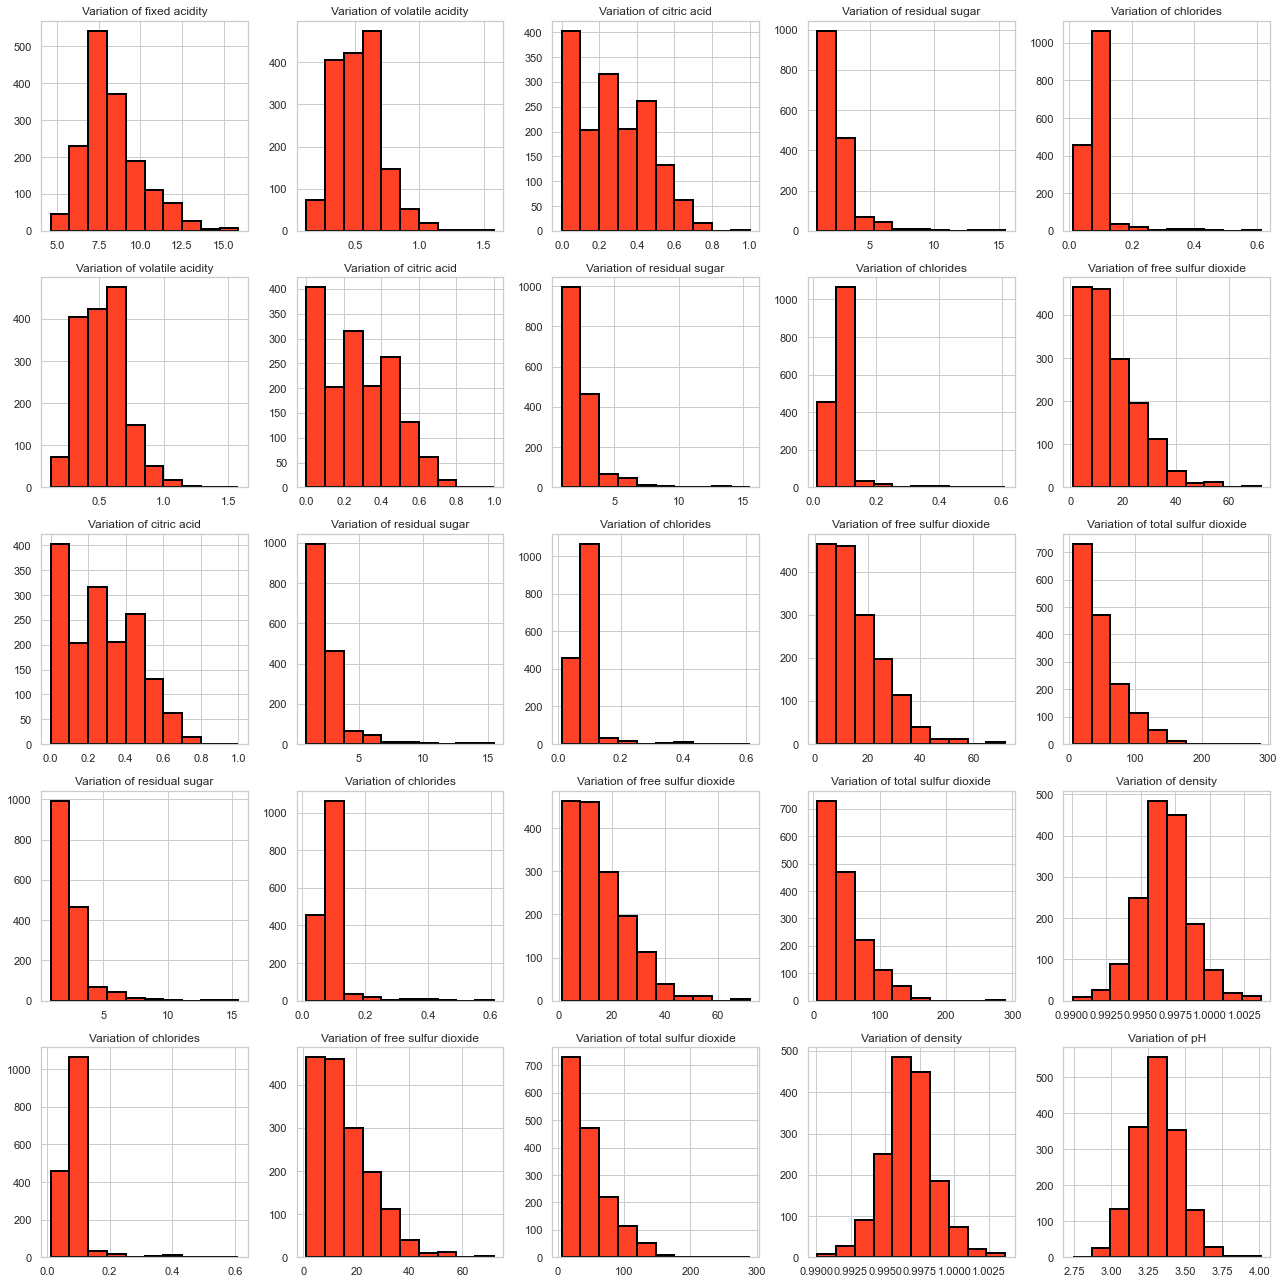

In [11]:
# Plotting the wine features in individual histograms. We will just use the default number of 
# bins (10) for each histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf() #gcf = get the current figure
fig.set_size_inches(18,18)
fig.tight_layout()

#  Using a Correlation Map/Matrix 

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

Key decisions to be made when creating a correlation matrix include: choice of correlation statistic, coding of the variables, treatment of missing data, and presentation.

### Reading a correlation matrix

In statistics, we’re often interested in understanding the relationship between two variables.

For example, we might want to understand the relationship between each of the qualities of the wine data. 

One way to quantify this relationship is to use the Pearson correlation coefficient, which is a measure of the linear association between two variables. It has a value between -1 and 1 where:

* -1 indicates a perfectly negative linear correlation between two variables
* 0 indicates no linear correlation between two variables
* 1 indicates a perfectly positive linear correlation between two variables

**The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.**

Look at the 'quality' feature. Which attributes are positively correlated to quality and which are negatively correlated. We can see that quality correlates strongly to fixed acidity, citric acid, sulfates, and alcohol, in precisely that order. While volatile acidity, clorides, sulfer dioxide, and density have the highest negative linear correlation.

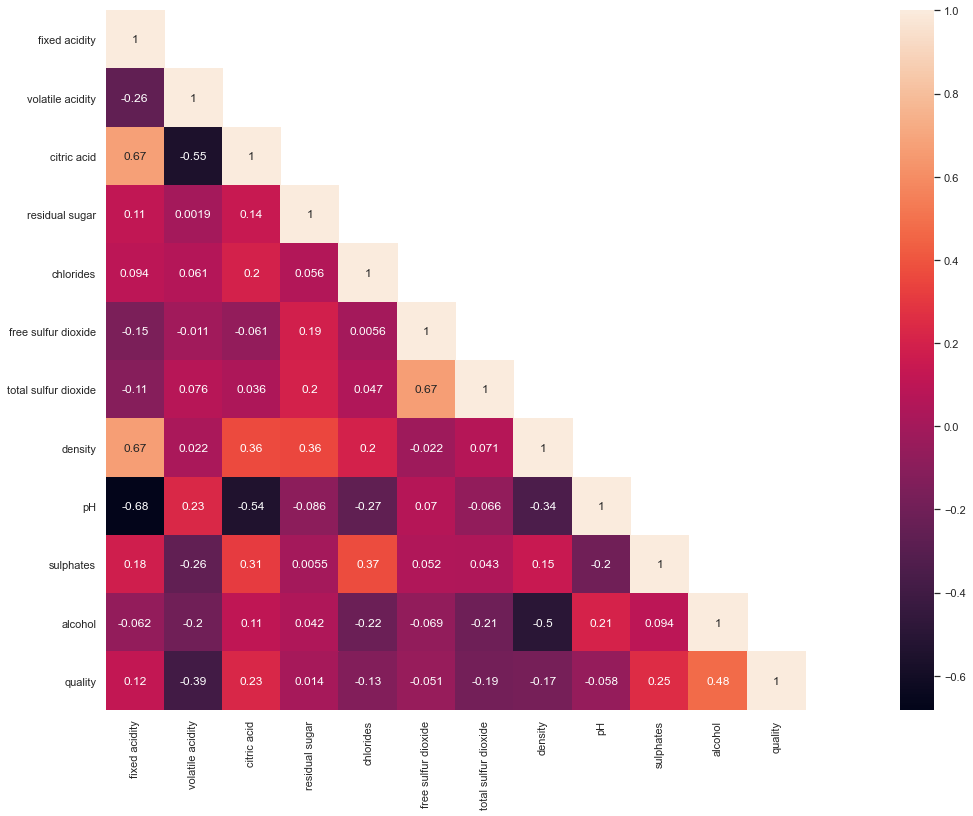

In [13]:
# Configuring a correlation matrix.

# The first statement sets us up for a pearson correlation, which is the standard correlation coefficient
cor_mat= df.corr()

# Store the computed coefficients in a mask object
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

# create the matrix using the following parameters with the data stored in the cor_mat variable and the mask variable
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#  What are some inferences we can make with the above chart?

1. The quality of wine is highly related to volatile acidity.

2. Also the quality of wine is highly correlated to alcohol.

3. pH and citric acid/ fixed acidity are highly inversely related as all of us know that acids have smaller pH values.

4. It is to be expected that there is self-relation here, as each feature is correlated to itself.

5. The other interesting feature is the alcohol data, look how it correlates to sugars and acids.

#### Removing highly correlated variables

Data scientists would normally remove highly correlated variables due to the fact that having too much data in our model can create a problem with "overfitting" our model. In this case though we will leave the correlated variables and continue on with our study.

# Visualizing quality in relation to other features

As we noted at the beginning of the exercise, we will have to compare the `quality` variable to the other features in the data such as fixed acidity compared to quality. Using data visualization we can uncover some interesting relationships in our data.

It is useful to view the features in our data with different types of plots as they can show us different aspects of our data.  Representing the data accurately, however, requires choosing the appropriate plot according to the nature of the data and the task at hand. Bar charts are appropriate for counts, whereas violin plots should be used to represent the characteristics of a distribution.

### Violin plots

A [violin plot](https://mode.com/blog/violin-plot-examples/) is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. Violin plots have many of the same summary statistics as box plots:
* the white dot represents the median
* the thick gray bar in the center represents the interquartile range
* the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

### Beeswarm plots

"Swarm" plots or ["beeswarm"](https://resources.rhoworld.com/blog/resourcebrcenter/rhos-blog/i-swarm-you-swarm-we-all-swarm-for-beeswarm-plots-0) plots are less abstract than violin plots but are similar and show similar things about the data.  Beeswarm plots are also better than strip plots and strip plots that use a random 'jittering' effect to move data points away from eachother. 

It looks a bit like a friendly swarm of bees buzzing about their hive. More importantly, each data point is clearly visible and no data are obscured by overplotting.

In [14]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

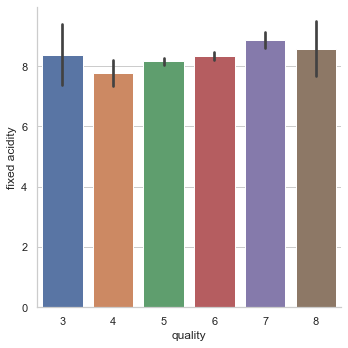

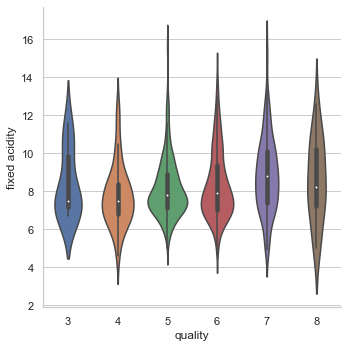

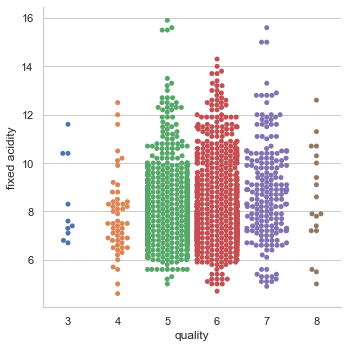

In [15]:
# First let's look at fixed acidity as it relates to quality
plot('fixed acidity','quality')

**Exercise: What inferences can you make about `fixed acidity`?**

One (maybe) obvious inference is that by looking at the beeswarm plot is that in the middle and near upper range of quality (5-7) we can see that fixed acidity is a huge determining factor, where as it has less notice in the highest quality and lowest quality levels. So we could say that mid-quality wines have a very noticeable fixed acidity that isn't as prevalent in higher and lower levels--in otherwords, the highest and lowest quality wines aren't necessarily influenced by the amount of fixed acidity in the wine.

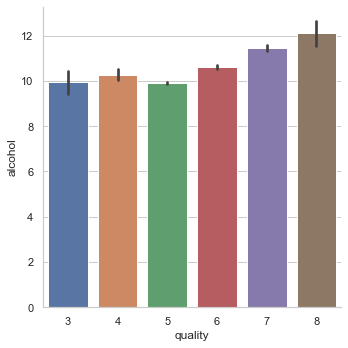

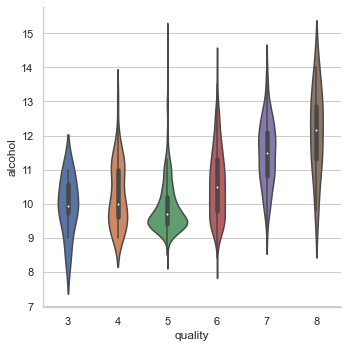

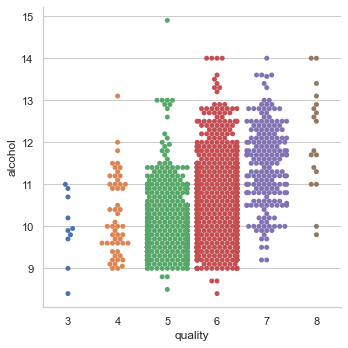

In [16]:
# for alcohol.
plot('alcohol','quality')

**Checkpoint: What inferences can you make about `alcohol`?**

We can infer that the lower quality wines typically have lower levels of alcohol in them, and higher rated wines tend to have higher levels of alcohol. This makes sense as sweeter wines can express less alcohol (shorter fermenation times) and higher end wines are aged longer and therefore use all the sugar in them as the yeasts convert the sugar in a wine to alcohol. We could also guess that residual sugars in higher quality wines might be lower than in lower quality wines.

Overall, the beeswarm plots seem to be the easiest to read and communicate information that is stored within the data the fastest.

### Exercise: compare other features with the quality feature

Take some time and input some of the other data features into our plots. We have the function to generate the plots so all we need to do is add the parameter.

In [ ]:
# Use: 

plot('<YOU ADD DATA PARAMETER HERE>','quality')


# Data Modeling

Now that we've spent a large portion of our time exploring the data, let's start looking at creating some models. We can use some code to leverage many features of pandas and dataframes to create multiple models quickly. In this first section we will configure eight regression models at once and see which provides the most accurate results.

In [17]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [18]:
label_quality = LabelEncoder()

In [19]:
# Bad = 0 and Good = 1 
df['quality'] = label_quality.fit_transform(df['quality'])

### Testing and Training our Eight Models

Let's look as some various ML models. Some of these models we have examined in depth and others are still pretty esoteric in regards to their use. It's very useful to look at multiple models when we have our data readily prepared to explore and find the model with the highest accuracy. We'll take a look at these eight models in depth.

* **Logistic Regression** - In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

* **Linear SVM** - Linear Support Vector Machine or linear-SVM(as it is often abbreviated), is a supervised classifier, generally used in bi-classification problem, that is the problem setting, where there are two classes.

* **rbfSVM** - In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.[

* **K-Nearest-Neighbors** - k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones.

* **Random Forest Classifier** - A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

* **Decision Tree** - Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

* **Gradient Boosting Classifier** - Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

* **Gaussian NB** - GaussianNB implements the Gaussian Naive Bayes algorithm for classification. 


In [20]:
# Let's break our data up into discreet training and testing sets
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [21]:
# First we'll store all the models in a variable so we can iterate through them all with their labels
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

# We'll also declare a couple of variables to store our accuracy scores (acc) and a place to 
# collect the scores and the labels (d), then we will render d in our code
acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modeling Algo':model_names,'Accuracy':acc}
d

{'Modeling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.875, 0.8725, 0.87, 0.8625, 0.9025, 0.89, 0.875, 0.8525]}

## Visualizing the Regression Model's Accuracy

There are a couple of main points that we should make about data visualization.

1. You must understand your data in order to get the best results from machine learning algorithms and also from your visualizations. 
2. The fastest way to learn more about your data is to use data visualization.
3. By exploring our data with more than one visualization we can sometimes uncover things that were not obvious to us before.
4. Data visualization is about data communication. We can communicate large amounts of data and results with visual aids.
5. Some data is viewed more effectively with different plots.

We can examine all of the results and visualize them to see which model is performing the best. We'll circle back to see which visual does the best job.

In [22]:
# Store the results in a pandas dataframe--decent but it takes time to read all of the values.
acc_frame=pd.DataFrame(d)
acc_frame

,Modeling Algo,Accuracy
0,LogisticRegression,0.8750
1,LinearSVM,0.8725
2,rbfSVM,0.8700
3,KNearestNeighbors,0.8625
4,RandomForestClassifier,0.9025
5,DecisionTree,0.8900
6,GradientBoostingClassifier,0.8750
7,GaussianNB,0.8525


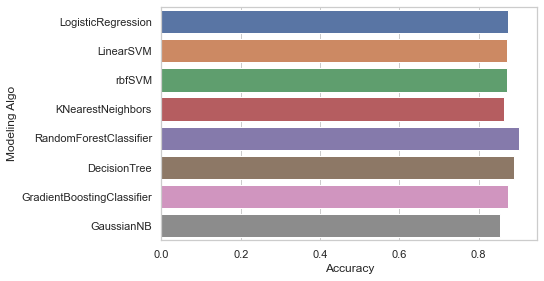

In [23]:
# This barplot does a great job at showing us which model has better accuracy.
sns.barplot(y='Modeling Algo',x='Accuracy',data=acc_frame)

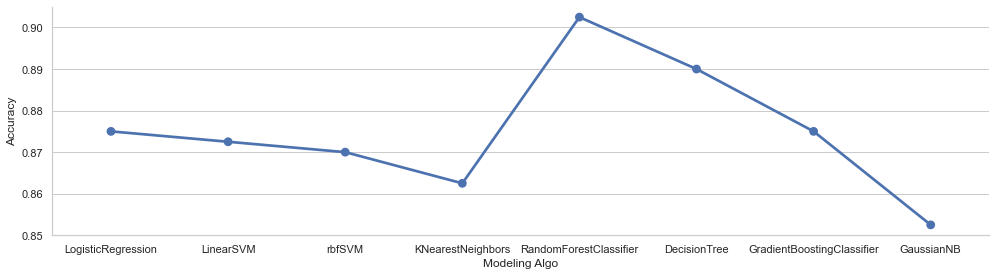

In [24]:
sns.factorplot(x='Modeling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

# The winner is:

Looking at the data matrix table, the bar plot and the point plot, which visualization does the best job in your opinion? The point plot does a great job in showing that it's performance is much higher than the others. 

Also, we an see that the Random Forest Classifier model is scoring above 0.89 and that makes for an accurate model. All of the models are performing quite well--but having results from all of them can add confidence to our results. If some of the models were way off, then it might be worthwhile to figure out exactly why they are not in line with the other models.

#  Parameter Tuning

Machine learning models are parameterized so that their behavior can be tuned for a given problem.

Models can have many parameters and finding the best combination of parameters can be treated as a search problem.

Machine Learning has a foundation built from several sophisticated models. Every such model has a set of keys called parameters which run them. Each parameter is set to a default value which can be changed as per requirement (say, based on some scoring metric).

Now, every real world data set is different and needs to be worked on differently. If the same model with a strict parameter set is applied on every data, a good result cannot be expected uniformly in all cases. Thus, these parameters must be adjusted in such a manner that the best predictions can be achieved by the model for every individual data set which comes by.

This very technique of adjusting the elements which control the behavior of a given model is called parameter tuning. Using this process we can narrow down and select the best algorithms for our research.

Let's look at five popular models and prepare each of them so we practice some parameter tuning. This is a practice that data scientists use with nearly each problem they encounter.

### 1.   Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

In [25]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [26]:
clf_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [27]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8841036414565826

In [28]:
# clf_lr.grid_scores_

In [29]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.875

###   2. k-Nearest Neighbor (KNN)

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power


In [30]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [31]:
clf_knn.best_score_

0.8774229691876752

In [32]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 2}

In [33]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.865

###   3. Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [37]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [38]:
clf_rf.best_score_

0.914124649859944

In [39]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [41]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.905

### 4. Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The idea of gradient boosting introduced the view of boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.

In [42]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [43]:
clf_gb.best_score_

0.9099439775910365

In [44]:
clf_gb.best_params_

{'n_estimators': 500}

In [45]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.895

### Checkpoint - Reviewing the results of parameter tuning:

Did the parameter tuning help? Let's compare the results.

* Algorithm.............. Before Tuning... After Parameter Tuning
* LogisticRegression..... 0.8750.......... 0.8841036414565826
* KNearestNeighbors...... 0.8625.......... 0.8774229691876752
* RandomForestClassifier. 0.9025.......... 0.914124649859944
* Gradient Boosting.......0.8750.......... 0.9099439775910365

It is clear that you can gain modest increases in model accuracy by performing parameter tuning. Now, you might be thinking that this process can be difficult, and you are right. In fact, because of the difficulty of determining what optimal model parameters are, some researchers use complex learning algorithms before experimenting adequately with simpler alternatives with better tuned parameters. However, this process should be in your wheelhouse and will round out your data science procedural knowledge!